##### Author: Vincent Yeo

### Sentiment Classification with IMDB Movie Reviews

#### Background:
To be added...

#### Task: 

Sentiment Classification

#### Adapted from : 
Brownlee, J. (2016, July 4). How to Predict Sentiment From Movie Reviews Using Deep Learning (Text Classification). Retrieved from https://machinelearningmastery.com/predict-sentiment-movie-reviews-using-deep-learning/

In [27]:
import numpy as np
import matplotlib.pyplot as plt     
import seaborn as sns

In [16]:
# CNN for the IMDB problem
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv1D, MaxPooling1D
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [40]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000

np_load_old = np.load

# modify the default parameters of np.load
np.load = lambda *a,**k: np_load_old(*a, allow_pickle=True, **k)

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

# restore np.load for future normal usage
np.load = np_load_old

In [41]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [42]:
# Number of words found in the review
print(len(np.unique(np.hstack(X_train))))

4998


In [43]:
# Average review length:
reviews = [len(x) for x in X_train]
print("Mean length of reviews is {:.3f} with std of +/- {:.3f}".format(np.mean(reviews),np.std(reviews)))

Mean length of reviews is 238.714 with std of +/- 176.494


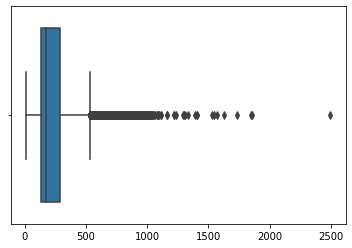

In [44]:
sns.boxplot(reviews)

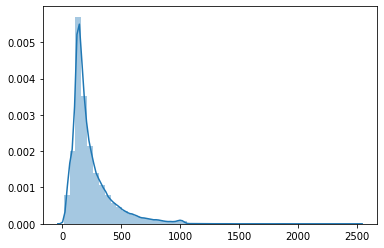

In [45]:
sns.distplot(reviews)

In [46]:
q25, q75 = np.percentile(reviews, [25, 75])
irq = q75-q25

print("Outliers are those beyond", q75 + irq * 1.5)

Outliers are those beyond 532.5


In [51]:
# pad dataset to a maximum review length in words
max_words = 532
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

In [58]:
# create the model
model = Sequential()

model.add(Embedding(top_words, 32, input_length=max_words))

model.add(Conv1D(32, 3, padding='same', activation='relu'))

model.add(MaxPooling1D())

model.add(Flatten())

model.add(Dense(250, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [59]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=128, verbose=1)

Train on 25000 samples, validate on 25000 samples
Epoch 1/5
25000/25000 [==============================] - 126s 5ms/step - loss: 0.4372 - acc: 0.7736 - val_loss: 0.3138 - val_acc: 0.8666
Epoch 2/5
25000/25000 [==============================] - 109s 4ms/step - loss: 0.2101 - acc: 0.9192 - val_loss: 0.2825 - val_acc: 0.8836
Epoch 3/5
25000/25000 [==============================] - 113s 5ms/step - loss: 0.1391 - acc: 0.9502 - val_loss: 0.3598 - val_acc: 0.8609
Epoch 4/5
25000/25000 [==============================] - 129s 5ms/step - loss: 0.0749 - acc: 0.9771 - val_loss: 0.3693 - val_acc: 0.8769
Epoch 5/5
25000/25000 [==============================] - 126s 5ms/step - loss: 0.0278 - acc: 0.9945 - val_loss: 0.4630 - val_acc: 0.8707


In [60]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 532, 32)           160000    
_________________________________________________________________
conv1d_5 (Conv1D)            (None, 532, 32)           3104      
_________________________________________________________________
max_pooling1d_5 (MaxPooling1 (None, 266, 32)           0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 8512)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 250)               2128250   
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 251       
Total params: 2,291,605
Trainable params: 2,291,605
Non-trainable params: 0
_________________________________________________________________


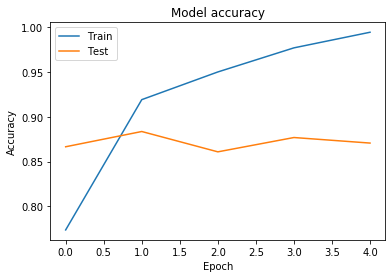

In [61]:
# Plot train vs test accuracy per epoch
plt.figure()
# Use the history metrics
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
# Make it pretty
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()

Seems like a case of overfitting since training accuracy increases without any changes to the test accuracy

In [62]:
# Final evaluation of the model
score = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy: {:.3f}%".format(score[1]*100))

25000/25000 [==============================] - 38s 2ms/step
Accuracy: 87.068%


#### Results and Analysis:

The model has achieved a 87.068% accuracy.

In [63]:
from keras.models import load_model
model.save('imdb.h5')
my_model = load_model('imdb.h5')